In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile

zip_path = "/content/archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


FileNotFoundError: [Errno 2] No such file or directory: '/content/archive.zip'

In [ ]:
from google.colab import files

uploaded = files.upload()

KeyboardInterrupt: 

After the file is uploaded, you can re-run the cell that extracts the zip file. Make sure the uploaded file is named `archive.zip` and placed in the `/content/` directory.

In [1]:
import os
os.listdir("/content")


['.config', 'sample_data']

In [2]:
!wget -O chest_xray.zip https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/f3c7e8e8-bf8c-4c66-bf74-b4bbdcb7f4e0/file_downloaded


--2026-02-13 17:49:05--  https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/f3c7e8e8-bf8c-4c66-bf74-b4bbdcb7f4e0/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1174 (1.1K) [application/json]
Saving to: ‘chest_xray.zip’

chest_xray.zip      100%[===================>]   1.15K  --.-KB/s    in 0s      

2026-02-13 17:49:05 (24.9 MB/s) - ‘chest_xray.zip’ saved [1174/1174]



In [4]:
import zipfile

with zipfile.ZipFile("chest_xray.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


BadZipFile: File is not a zip file

In [5]:
!pip install kaggle



In [6]:
import os
import json

kaggle_username = "kinjal2085 "
kaggle_key = "KGAT_16a9e8ebc639ae7467a509001e2538eb"

kaggle_data = {
    "username": kaggle_username,
    "key": kaggle_key
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_data, f)

os.chmod("/root/.kaggle/kaggle.json", 600)

print("Kaggle API configured successfully!")


Kaggle API configured successfully!


In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:28<00:00, 111MB/s] 
100% 2.29G/2.29G [00:28<00:00, 85.7MB/s]


In [8]:
import zipfile

with zipfile.ZipFile("chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [9]:
import os
os.listdir("/content")



['.config',
 'chest-xray-pneumonia.zip',
 'chest_xray.zip',
 'chest_xray',
 'sample_data']

In [10]:
import os
os.listdir("/content/chest_xray")


['train', '__MACOSX', 'val', 'chest_xray', 'test']

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [13]:
train_dir = "/content/chest_xray/train"
val_dir = "/content/chest_xray/val"
test_dir = "/content/chest_xray/test"


In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 294ms/step - accuracy: 0.7775 - loss: 0.4793 - val_accuracy: 0.6875 - val_loss: 0.8852
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.9588 - loss: 0.1176 - val_accuracy: 0.8750 - val_loss: 0.2248
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.9713 - loss: 0.0775 - val_accuracy: 0.9375 - val_loss: 0.2031
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 278ms/step - accuracy: 0.9770 - loss: 0.0767 - val_accuracy: 1.0000 - val_loss: 0.0771
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.9761 - loss: 0.0710 - val_accuracy: 0.8125 - val_loss: 0.2794


In [17]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


Final Training Accuracy: 0.9804447889328003
Final Validation Accuracy: 0.8125


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/chest_xray/test",
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)

print("Test Accuracy:", test_acc)


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.7251 - loss: 1.2599
Test Accuracy: 0.7483974099159241


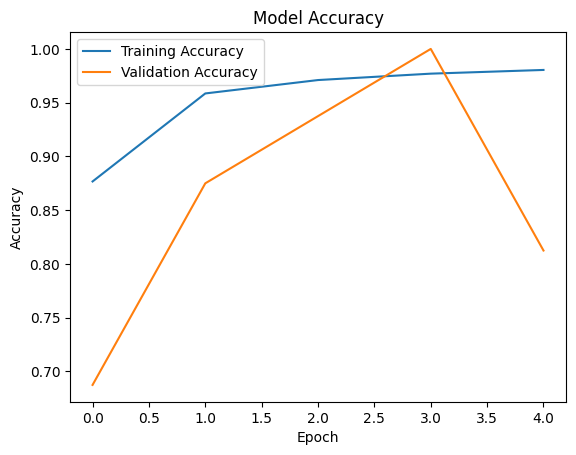

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [20]:
model.save("cnn_pneumonia_model.h5")



In [21]:
model.save("cnn_pneumonia_model.keras")
